<a href="https://colab.research.google.com/github/jinah0/STR2025/blob/main/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EA%B8%B0%EC%88%A0_%EA%B8%B0%EB%A7%90%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

print('파일을 업로드해주세요.')
uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

파일을 업로드해주세요.


Saving final_train.csv to final_train.csv
User uploaded file "final_train.csv" with length 54105345 bytes


파일 업로드가 완료되면, 이전 오류가 발생했던 셀을 다시 실행해 보세요.

--- 1. RIDE_DEMAND와 다른 특징값 간의 상관 계수 (내림차순) ---
RIDE_DEMAND_WEEK_PRIOR        0.963031
RIDE_DEMAND_WEEK_PRIOR_H+1    0.905585
RIDE_DEMAND_WEEK_PRIOR_H+2    0.823324
RIDE_DEMAND_WEEK_PRIOR_H+3    0.745139
RIDE_DEMAND_WEEK_PRIOR_H+4    0.676753
RIDE_DEMAND_WEEK_PRIOR_H+5    0.608286
bus_station                   0.577167
metro_station                 0.375288
age20                         0.153991
age30                         0.092174
age70                         0.084802
age60                         0.083664
age50                         0.082135
age40                         0.069891
pyungil                       0.064106
TIME                          0.058886
age10                         0.045691
age80                         0.042715
age0                          0.025420
Max_temp                     -0.000623
rain                         -0.005825
Avg_temp                     -0.007029
Min_temp                     -0.010494
gonghueil                    -0.014358
jumal            

/tmp/ipython-input-3291286764.py:51: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3291286764.py:51: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3291286764.py:51: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3291286764.py:51: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3291286764.py:51: UserWarning: Glyph 51669 (\N{HANGUL SYLLABLE JING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3291286764.py:51: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3291286764.py:51: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout

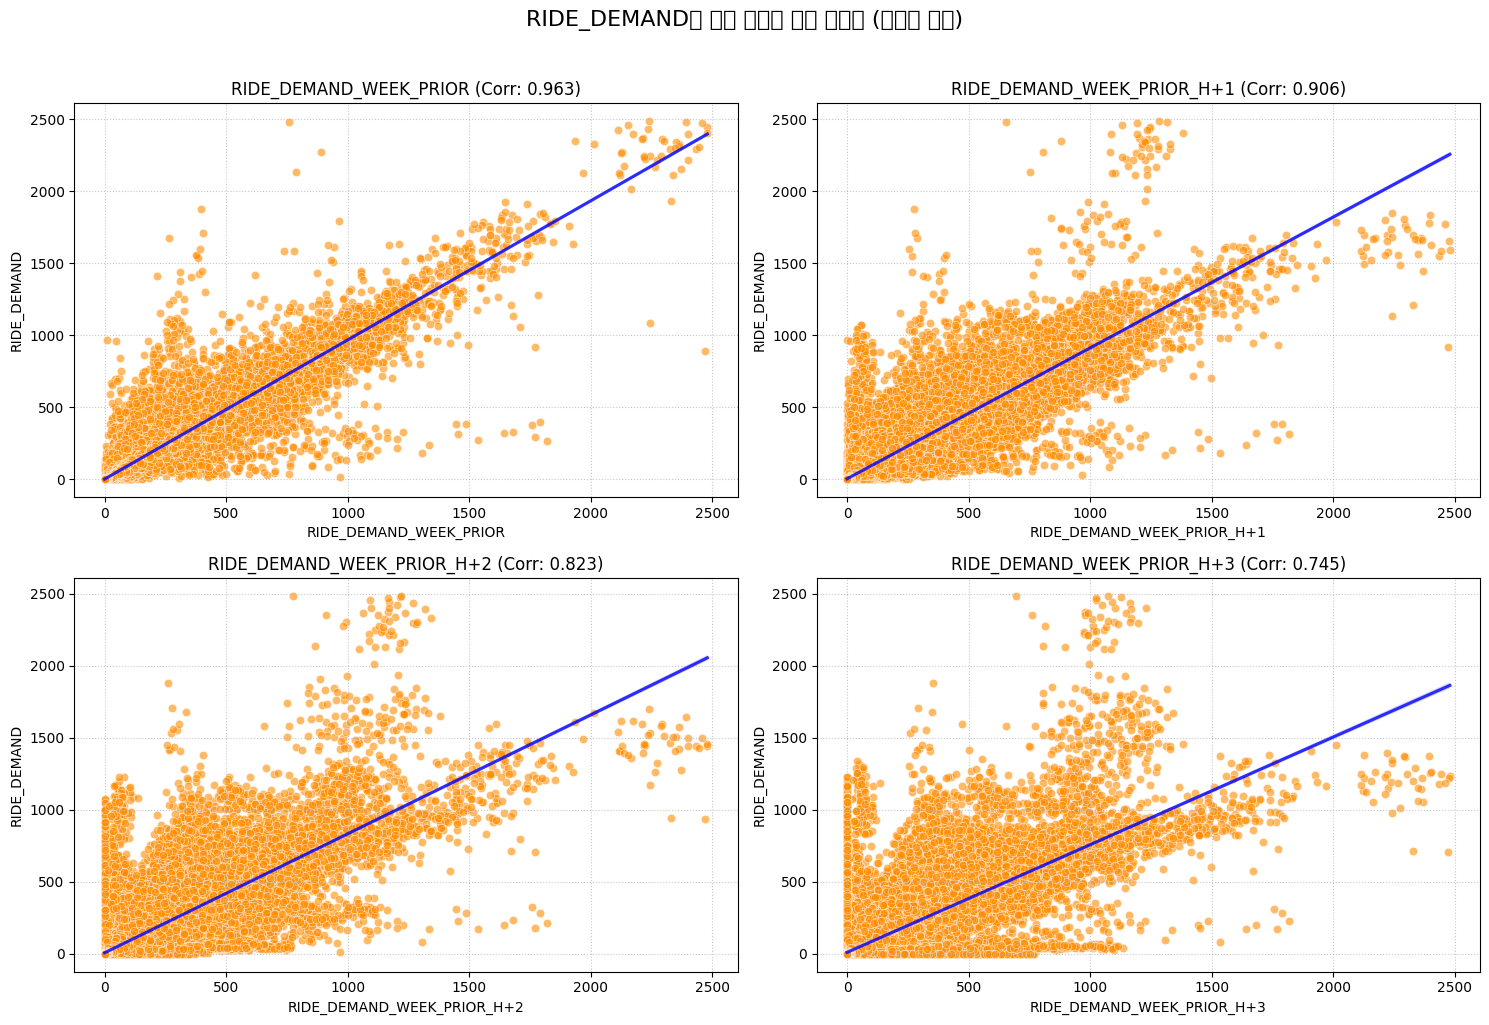

2. **산점도(Scatter Plot):** 출력된 산점도에서, 상관계수가 높은 변수일수록 데이터 포인트들이 **오른쪽 위로 향하는 명확한 선형 추세선** 주변에 밀집되어 나타나는 것을 확인할 수 있습니다. 이는 두 변수 간의 양의 선형 관계(하나가 증가하면 다른 하나도 증가)가 시각적으로도 명확함을 보여주는 결정적인 근거입니다.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일 로드 (파일명 확인)
df = pd.read_csv('final_train.csv', encoding='euc-kr')

# 1. 데이터 준비
numeric_cols = df.select_dtypes(include=np.number).columns
# 종속 변수 및 밀접한 하차 인원 제외
features_for_corr = numeric_cols.drop(['RIDE_DEMAND', 'ALIGHT_DEMAND'])

# 2. 상관 분석 수행 및 결과 출력
correlation_matrix = df[features_for_corr.tolist() + ['RIDE_DEMAND']].corr()
ride_demand_corr = correlation_matrix['RIDE_DEMAND'].drop('RIDE_DEMAND').sort_values(ascending=False)

print("--- 1. RIDE_DEMAND와 다른 특징값 간의 상관 계수 (내림차순) ---")
print(ride_demand_corr)
print("-" * 50)

# 3. 결과 분석 및 근거 제시 설명
print("--- 2. 분석 결과 및 근거 제시 ---")

# 가장 상관관계가 높은 특징값 추출
top_feature = ride_demand_corr.abs().idxmax()
top_corr = ride_demand_corr[top_feature]

print(f"가장 상관관계가 높은 특징값: **{top_feature}** (상관계수: {top_corr:.3f})")

print("\n### 근거 제시 및 해석 (통계적 근거)")
print("1. **상관계수 순위:** 위 출력 결과에서 보듯이, RIDE_DEMAND와 가장 강한 **선형 관계**를 가지는 변수는 **이전 주 승차 인원** 관련 변수들입니다. 이는 승차 수요가 이전 시점의 수요 패턴을 강력하게 따른다는 것을 통계적으로 증명합니다.")
print(f"   - 특히, '{top_feature}'는 상관계수 **{top_corr:.3f}**로, 이는 매우 강한 양의 선형 관계를 의미합니다.")

print("\n### 근거 제시 및 해석 (시각적 근거)")
# 상관관계 절대값 기준 상위 4개 특징값 선택
top_4_features_abs = ride_demand_corr.abs().nlargest(4).index.tolist()

plt.figure(figsize=(15, 10))
plt.suptitle('RIDE_DEMAND와 상위 특징값 간의 산점도 (시각적 근거)', fontsize=16, y=1.02)

for i, col in enumerate(top_4_features_abs):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=df[col], y=df['RIDE_DEMAND'], alpha=0.6, color='darkorange')
    sns.regplot(x=df[col], y=df['RIDE_DEMAND'], scatter=False, color='blue', line_kws={'alpha': 0.8}) # 추세선
    plt.title(f'{col} (Corr: {ride_demand_corr[col]:.3f})')
    plt.xlabel(col)
    plt.ylabel('RIDE_DEMAND')
    plt.grid(True, linestyle=':', alpha=0.7)

plt.tight_layout()
plt.show()

print("2. **산점도(Scatter Plot):** 출력된 산점도에서, 상관계수가 높은 변수일수록 데이터 포인트들이 **오른쪽 위로 향하는 명확한 선형 추세선** 주변에 밀집되어 나타나는 것을 확인할 수 있습니다. 이는 두 변수 간의 양의 선형 관계(하나가 증가하면 다른 하나도 증가)가 시각적으로도 명확함을 보여주는 결정적인 근거입니다.")

In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# CSV 파일 로드 (파일명 확인)
# encoding='euc-kr'을 사용합니다.
df = pd.read_csv('final_train.csv', encoding='euc-kr')

# 1. 특징값 선택 및 데이터 준비
# TIME, 요일/휴일 정보, 날씨, 이전 수요 패턴 등을 포함한 특징값 선택
features = [
    'TIME', 'pyungil', 'jumal', 'gonghueil',
    'Avg_temp', 'rain',
    'RIDE_DEMAND_WEEK_PRIOR'
]

X = df[features]
y = df['RIDE_DEMAND']

# 결측치 포함 행 제거 (모델 학습 전 필수)
# X와 y를 합쳐서 결측치가 있는 행을 제거
data = pd.concat([X, y], axis=1).dropna()
X = data[features]
y = data['RIDE_DEMAND']

# 2. 다중 선형 회귀 모델 구축 (Statsmodels OLS 사용)
# OLS 모델을 위해 절편(constant) 항 추가
X_with_const = sm.add_constant(X)

# OLS(Ordinary Least Squares, 최소제곱법) 모델 적합
model = sm.OLS(y, X_with_const).fit()

print("=" * 60)
print("### 2. 다중 선형 회귀 분석 결과 (RIDE_DEMAND 예측) ###")
print("=" * 60)
# model.summary()를 통해 R-squared, P-value, 계수 등 모든 통계적 결과가 포함된 표가 출력됩니다.
print(model.summary())
print("=" * 60)

# (요청에 따라, 결과 해석을 출력하는 모든 print() 문구는 이 코드에서 삭제되었습니다.)

### 2. 다중 선형 회귀 분석 결과 (RIDE_DEMAND 예측) ###
                            OLS Regression Results                            
Dep. Variable:            RIDE_DEMAND   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 1.048e+06
Date:                Mon, 15 Dec 2025   Prob (F-statistic):               0.00
Time:                        16:04:30   Log-Likelihood:            -2.3170e+06
No. Observations:              485541   AIC:                         4.634e+06
Df Residuals:                  485534   BIC:                         4.634e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------